In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
df['title']

0              EMS: BACK PAINS/INJURY
1             EMS: DIABETIC EMERGENCY
2                 Fire: GAS-ODOR/LEAK
3              EMS: CARDIAC EMERGENCY
4                      EMS: DIZZINESS
                     ...             
663517    Traffic: VEHICLE ACCIDENT -
663518          EMS: GENERAL WEAKNESS
663519          EMS: VEHICLE ACCIDENT
663520            Fire: BUILDING FIRE
663521    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 663522, dtype: object

In [14]:
df['title'].apply(lambda X:X.split(':'))

0              [EMS,  BACK PAINS/INJURY]
1             [EMS,  DIABETIC EMERGENCY]
2                 [Fire,  GAS-ODOR/LEAK]
3              [EMS,  CARDIAC EMERGENCY]
4                      [EMS,  DIZZINESS]
                       ...              
663517    [Traffic,  VEHICLE ACCIDENT -]
663518          [EMS,  GENERAL WEAKNESS]
663519          [EMS,  VEHICLE ACCIDENT]
663520            [Fire,  BUILDING FIRE]
663521    [Traffic,  VEHICLE ACCIDENT -]
Name: title, Length: 663522, dtype: object

In [15]:
df['type'] = df['title'].apply(lambda X:X.split(':')[0])

In [16]:
df['type']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: type, Length: 663522, dtype: object

In [17]:
zip_counts = df.groupby(['zip', 'type']).size().unstack().fillna(0)

In [18]:
zip_counts

type,EMS,Fire,Traffic
zip,,,
1104.0,0.0,0.0,1.0
3103.0,0.0,2.0,0.0
3366.0,0.0,0.0,1.0
7081.0,0.0,0.0,1.0
7203.0,0.0,0.0,1.0
...,...,...,...
19610.0,7.0,0.0,1.0
21701.0,0.0,2.0,0.0
23005.0,0.0,0.0,2.0


In [20]:
zip_counts_norm = zip_counts.div(zip_counts.sum(axis = 1), axis = 0)

In [21]:
zip_counts_norm

type,EMS,Fire,Traffic
zip,,,
1104.0,0.000,0.0,1.000
3103.0,0.000,1.0,0.000
3366.0,0.000,0.0,1.000
7081.0,0.000,0.0,1.000
7203.0,0.000,0.0,1.000
...,...,...,...
19610.0,0.875,0.0,0.125
21701.0,0.000,1.0,0.000
23005.0,0.000,0.0,1.000


In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 0)
kmeans.fit(zip_counts_norm)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [27]:
pivot = pd.pivot_table(df, index = 'zip', columns = 'type', values = 'lat', aggfunc = 'count')

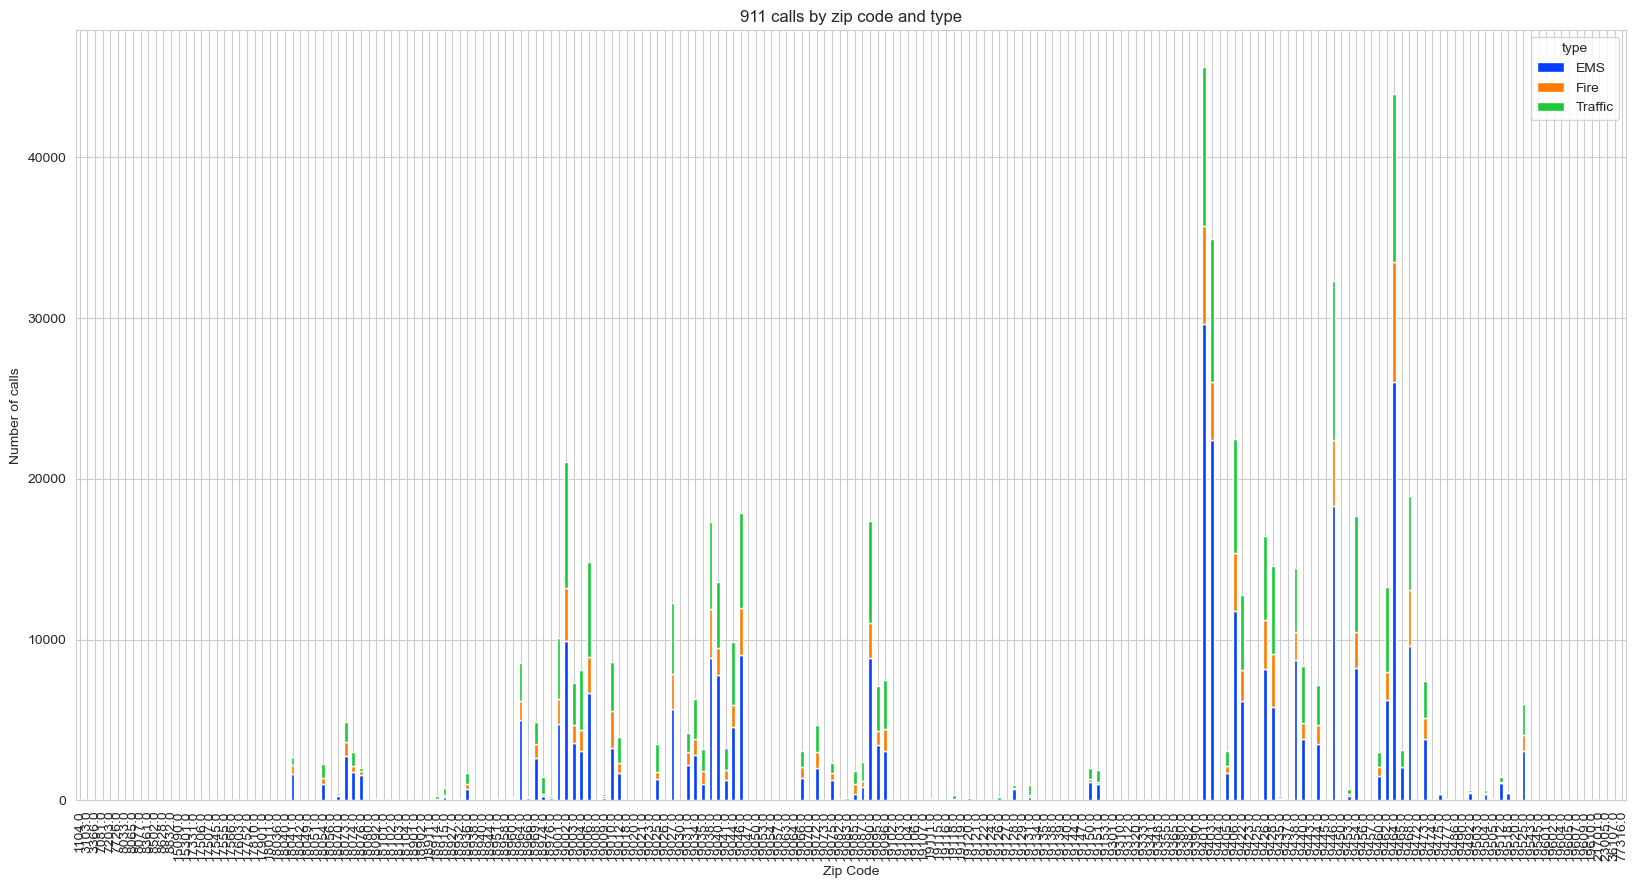

In [30]:
sns.set_style('whitegrid')
sns.set_palette('bright')
pivot.plot(kind = 'bar', stacked = True, figsize = (20, 10))
plt.title('911 calls by zip code and type')
plt.xlabel('Zip Code')
plt.ylabel('Number of calls')
plt.show()